In [47]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()

import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.DataFrame(data['data'], columns = ['x1', 'x2', 'x3', 'x4'])
df['labels'] = data['target']
df['species'] = df['labels'].apply(lambda x: 'setosa' if x == 0 else 'versicolor'
                                                      if x == 1 else 'virginica')

In [49]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          50          0
2             0           0         50


In [50]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(data['data'])
print(model.inertia_) # по этому строим график

78.851441426146


In [51]:
labels = model.labels_
varieties = df['species']

In [52]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          48         14
1            50           0          0
2             0           2         36


In [53]:
# после нормализации
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data['data']) # тут [[....]]
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(data['data'])

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(data['data'])
labels = pipeline.predict(data['data'])

In [56]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  setosa  versicolor  virginica
labels                                  
0               0          39         14
1              50           0          0
2               0          11         36


Иерархическая кластеризация

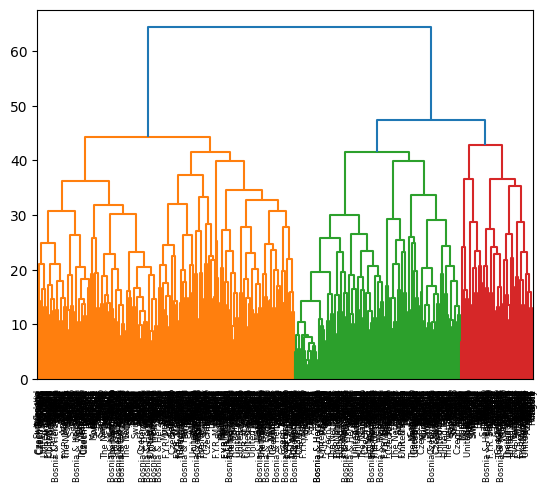

In [75]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
df_euro = pd.read_csv('/content/eurovision-2016.csv')
sample = df_euro[['Jury A', 'Jury B', 'Jury C', 'Jury D', 'Jury E', 'Jury Rank', 'Televote Rank']].to_numpy()
mergings = linkage(sample, method='complete')
dendrogram(mergings, labels=df_euro['From country'].to_numpy(), leaf_rotation=90, leaf_font_size=6)
plt.show()

In [77]:
from scipy.cluster.hierarchy import linkage
mergings = linkage(sample, method='complete')
from scipy.cluster.hierarchy import fcluster #указываем высоту 30 и отсекаем кластеры
labels = fcluster(mergings, 30, criterion='distance')
print(labels) # начало от 1, а не от 0

import pandas as pd
pairs = pd.DataFrame({'labels': labels, 'countries': df_euro['From country'].to_numpy()})
print(pairs.sort_values('labels'))

[ 2  3  5 ... 19 12 11]
     labels         countries
101       1        Azerbaijan
139       1           Belarus
824       1            Russia
820       1            Russia
288       1    Czech Republic
..      ...               ...
311      24           Denmark
543      24           Iceland
365      24  F.Y.R. Macedonia
905      24          Slovenia
988      24       Switzerland

[1066 rows x 2 columns]


t-SNE - t-распределенное стохастическое соседское встраивание

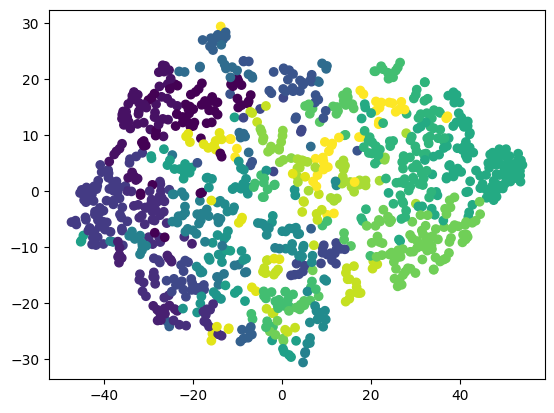

In [79]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(sample)
xs, ys = transformed[:,0], transformed[:,1]
plt.scatter(xs, ys, c=labels)
plt.show() #species - кластер точки

PCA

In [82]:
df_pca = pd.read_csv('/content/grains.csv')
samples = df_pca[['0', '1', '2', '3', '4', '5', '6']].to_numpy()

In [83]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
transformed = model.transform(samples) #выход имеет ту же разменрность что и исходное признаковое пространство
#PCA называется «анализом главных компонентов», потому что он изучает «основные компоненты» данных - это направления, в которых объекты различаются больше всего

In [84]:
print(model.components_) #это 2D массив, где строка - один основной компонент

[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]
 [ 0.26453354 -0.28251995  0.05903584 -0.40014946  0.31923869  0.06429754
  -0.76193973]
 [-0.19944949  0.57881686 -0.05776023  0.43610024 -0.23416358  0.02514736
  -0.61335659]
 [-0.13717297  0.57475603 -0.05310454 -0.78699776 -0.1448029  -0.00157564
   0.08765361]
 [ 0.28063956 -0.30155864 -0.04522905 -0.11343761 -0.89626785  0.003288
  -0.10992364]
 [ 0.02539824 -0.0658399  -0.99412565 -0.00143143  0.0815499  -0.00114269
  -0.00897193]]


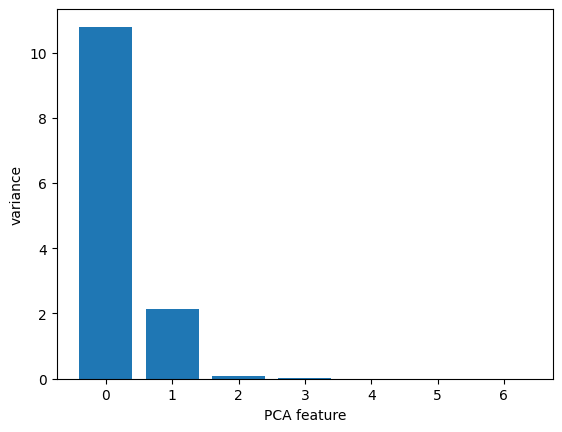

In [86]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_) #график оцененной дисперсии новых признаков
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)
transformed = pca.transform(samples)
print(transformed.shape) #выход размерность (210, 2)

(210, 2)


In [89]:
print(pca.components_)

[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]]


Non-negative matrix factorization (NMF)

In [ ]:
from sklearn.decomposition import NMF
model = NMF(n_components=2) # компоненты всегда указываются
model.fit(samples)

nmf_features = model.transform(samples)
print(model.components_) # 2D матрица (2 копоненты в R^n), размер 2 на 4, т.к 2 - стало, 4 - было
print(nmf_features)

In [ ]:
# применение NMF для изображений
bitmap = sample.reshape((2, 3))
from matplotlib import pyplot as plt
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()

In [ ]:
#Построение рекомендательной системы
from sklearn.decomposition import NMF
nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)

#  оценка косинусного сходства
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features) # ко всем признакам NMF
# if has index 23
current_article = norm_features[23,:]
similarities = norm_features.dot(current_article)
print(similarities)

import pandas as pd
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)
current_article = df.loc['Dog bites man']
similarities = df.dot(current_article)

print(similarities.nlargest())